In [30]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt



In [31]:
#note:
#sth is strange with (2,0,'tot') and others vol from 1 Oct 00:00 to 7Oct 23:59

df_merged_volume = pd.read_csv("../data/preprocessed_input_interpolate_20min.csv")

In [32]:
df_merged_volume.head()
df_merged_volume['date'] = pd.to_datetime(df_merged_volume['date'])
df_merged_volume['date']

0      2016-09-20 00:00:00
1      2016-09-20 00:20:00
2      2016-09-20 00:40:00
3      2016-09-20 01:00:00
4      2016-09-20 01:20:00
5      2016-09-20 01:40:00
6      2016-09-20 02:00:00
7      2016-09-20 02:20:00
8      2016-09-20 02:40:00
9      2016-09-20 03:00:00
10     2016-09-20 03:20:00
11     2016-09-20 03:40:00
12     2016-09-20 04:00:00
13     2016-09-20 04:20:00
14     2016-09-20 04:40:00
15     2016-09-20 05:00:00
16     2016-09-20 05:20:00
17     2016-09-20 05:40:00
18     2016-09-20 06:00:00
19     2016-09-20 06:20:00
20     2016-09-20 06:40:00
21     2016-09-20 07:00:00
22     2016-09-20 07:20:00
23     2016-09-20 07:40:00
24     2016-09-20 08:00:00
25     2016-09-20 08:20:00
26     2016-09-20 08:40:00
27     2016-09-20 09:00:00
28     2016-09-20 09:20:00
29     2016-09-20 09:40:00
               ...        
1987   2016-10-17 14:20:00
1988   2016-10-17 14:40:00
1989   2016-10-17 15:00:00
1990   2016-10-17 15:20:00
1991   2016-10-17 15:40:00
1992   2016-10-17 16:00:00
1

In [33]:
df_merged_volume['timeofday'] = df_merged_volume.date.apply( lambda d : d.hour+d.minute/60.)

In [65]:
useful_cols = [
              #(1, 0, 'cargocar'),
              #(1, 0, 'etc'),
              #(1, 0, 'motorcycle'),
              #(1, 0, 'privatecar'),
#                "(1, 0, 'tot')",
              #(1, 0, 'unknowncar'),
              #(1, 1, 'cargocar'),
              #(1, 1, 'etc'),
              #(1, 1, 'motorcycle'),
              #(1, 1, 'privatecar'),
#                "(1, 1, 'tot')",
              #(1, 1, 'unknowncar'),
              #(2, 0, 'cargocar'),
              #(2, 0, 'etc'),
              #(2, 0, 'motorcycle'),
              #(2, 0, 'privatecar'),
               "(2, 0, 'tot')",
              #(2, 0, 'unknowncar'),
              #(3, 0, 'cargocar'),
              #(3, 0, 'etc'),
              #(3, 0, 'motorcycle'),
              #(3, 0, 'privatecar'),
#                "(3, 0, 'tot')",
              #(3, 0, 'unknowncar'),
              #(3, 1, 'cargocar'),
              #(3, 1, 'etc'),
              #(3, 1, 'motorcycle'),
              #(3, 1, 'privatecar'),
#                "(3, 1, 'tot')",
              #(3, 1, 'unknowncar'),
               "('A', 2)",
#                "('A', 3)",
#                "('B', 1)",
#                "('B', 3)",
#                "('C', 1)",
#                "('C', 3)",
              'date',
              'hour',
              'pressure',
              'sea_pressure',
              'wind_direction',
              'wind_speed',
              'temperature',
               'rel_humidity',
               'precipitation',
               'dayofweek',
               'is_holiday',
               'timeofday'
              ]

sel_rows = df_merged_volume[ lambda r : ((r.timeofday>= 6) & (r.timeofday<10)) |
		                        ((r.timeofday>=15) & (r.timeofday<19))
		           ]
df_merged_volume.columns

Index(['(1, 0, 'cargocar')', '(1, 0, 'etc')', '(1, 0, 'motorcycle')',
       '(1, 0, 'privatecar')', '(1, 0, 'tot')', '(1, 0, 'unknowncar')',
       '(1, 1, 'cargocar')', '(1, 1, 'etc')', '(1, 1, 'motorcycle')',
       '(1, 1, 'privatecar')', '(1, 1, 'tot')', '(1, 1, 'unknowncar')',
       '(2, 0, 'cargocar')', '(2, 0, 'etc')', '(2, 0, 'motorcycle')',
       '(2, 0, 'privatecar')', '(2, 0, 'tot')', '(2, 0, 'unknowncar')',
       '(3, 0, 'cargocar')', '(3, 0, 'etc')', '(3, 0, 'motorcycle')',
       '(3, 0, 'privatecar')', '(3, 0, 'tot')', '(3, 0, 'unknowncar')',
       '(3, 1, 'cargocar')', '(3, 1, 'etc')', '(3, 1, 'motorcycle')',
       '(3, 1, 'privatecar')', '(3, 1, 'tot')', '(3, 1, 'unknowncar')',
       '('A', 2)', '('A', 3)', '('B', 1)', '('B', 3)', '('C', 1)', '('C', 3)',
       'date', 'hour', 'pressure', 'sea_pressure', 'wind_direction',
       'wind_speed', 'temperature', 'rel_humidity', 'precipitation',
       'dayofweek', 'is_holiday', 'timeofday'],
      dtype='object')

In [35]:
sel_rows = sel_rows[ useful_cols ]

In [41]:
sel_rows.head()

,"(2, 0, 'tot')","('A', 2)",rel_humidity,precipitation,dayofweek,is_holiday,timeofday
18,33.0,70.4825,43.000000,0.0,1,0,6.000000
19,31.0,93.1900,42.888889,0.0,1,0,6.333333
20,54.0,41.0900,42.777778,0.0,1,0,6.666667
21,79.0,71.1400,42.666667,0.0,1,0,7.000000
22,86.0,55.6600,42.555556,0.0,1,0,7.333333


In [39]:
#split to train and test set
train_rows = sel_rows[: -24*7]
test_rows = sel_rows[-24*7:] #reserve 1 week for test

#get numpy array from panda dataframe
train_arr = train_rows.values
test_arr = test_rows.values

In [40]:
train_arr

array([[ 33.        ,  70.4825    ,  43.        , ...,   1.        ,
          0.        ,   6.        ],
       [ 31.        ,  93.19      ,  42.88888889, ...,   1.        ,
          0.        ,   6.33333333],
       [ 54.        ,  41.09      ,  42.77777778, ...,   1.        ,
          0.        ,   6.66666667],
       ..., 
       [ 59.        ,  83.91      ,  75.33333333, ...,   0.        ,
          1.        ,  18.        ],
       [ 53.        ,  66.03      ,  75.25925926, ...,   0.        ,
          1.        ,  18.33333333],
       [ 41.        ,  46.78      ,  75.18518519, ...,   0.        ,
          1.        ,  18.66666667]])

In [42]:
#scale feature array to range -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [43]:
scaler = scaler.fit(train_arr)

In [50]:
train_scaled_arr = scaler.transform(train_arr)

In [53]:
# Checking

train_scaled_arr[-5:]

array([[-0.12162162, -0.62785908,  0.1957672 , -1.        , -1.        ,
         1.        ,  0.78947368],
       [-0.25675676, -0.63736745,  0.19312169, -1.        , -1.        ,
         1.        ,  0.84210526],
       [-0.2027027 , -0.43545702,  0.19047619, -1.        , -1.        ,
         1.        ,  0.89473684],
       [-0.28378378, -0.59214793,  0.18783069, -1.        , -1.        ,
         1.        ,  0.94736842],
       [-0.44594595, -0.7608448 ,  0.18518519, -1.        , -1.        ,
         1.        ,  1.        ]])

In [54]:
test_scaled_arr = scaler.transform(test_arr)

In [55]:
test_scaled_arr[-5:]

array([[ 0.12162162, -0.67110683,  0.78571429, -1.        , -1.        ,
         1.        ,  0.78947368],
       [-0.21621622, -0.66059066,  0.78571429, -1.        , -1.        ,
         1.        ,  0.84210526],
       [-0.24324324, -0.58811673,  0.78571429, -1.        , -1.        ,
         1.        ,  0.89473684],
       [-0.28378378, -0.74682324,  0.77777778, -1.        , -1.        ,
         1.        ,  0.94736842],
       [-0.28378378, -0.73398475,  0.76984127, -1.        , -1.        ,
         1.        ,  1.        ]])

In [37]:
#sample subsequence from the time series
train_seqs = []
nSegments = train_arr.shape[0]//12 # each segment holds 4hr data (12 datapoints, 20min each)
for segment in range(nSegments):
    for t in range(6):
        startIdx = segment*12 + t
        train_seqs.append(train_scaled_arr[startIdx: startIdx+7])
train_seqs = np.stack(train_seqs)

test_seqs = []
nSegments = test_arr.shape[0]//12 # each segment holds 4hr data (12 datapoints, 20min each)
for segment in range(nSegments):
    for t in range(6):
        startIdx = segment*12 + t
        test_seqs.append(test_scaled_arr[startIdx: startIdx+7])
test_seqs = np.stack(test_seqs)

#keras
#https://keras.io/getting-started/sequential-model-guide/#examples
input_dim = len(useful_cols)
output_dim = len(useful_cols)
timesteps = 6 # use 6 timesteps to predict the 7th

x_train, y_train = train_seqs[:, 0:-1], train_seqs[:, -1]
x_test , y_test  =  test_seqs[:, 0:-1],  test_seqs[:, -1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 6, 64)             18432     
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 455       
Total params: 51,911
Trainable params: 51,911
Non-trainable params: 0
_________________________________________________________________
Train on 252 samples, validate on 84 samples
Epoch 1/500
252/252 [==============================] - 1s - loss: 0.5439 - val_loss: 0.4626
Epoch 2/500
252/252 [==============================] - 0s - loss: 0.4463 - val_loss: 0.3891
Epoch 3/500
252/252 [==============================] - 0s - loss: 0.3524 - val_loss: 0.3139
Epoch 4/500
252/252 [==============================] - 0s - loss: 0.2573 - val_lo

252/252 [==============================] - 0s - loss: 0.0096 - val_loss: 0.0130
Epoch 81/500
252/252 [==============================] - 0s - loss: 0.0095 - val_loss: 0.0130
Epoch 82/500
252/252 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0128
Epoch 83/500
252/252 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0126
Epoch 84/500
252/252 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0129
Epoch 85/500
252/252 [==============================] - 0s - loss: 0.0093 - val_loss: 0.0125
Epoch 86/500
252/252 [==============================] - 0s - loss: 0.0093 - val_loss: 0.0125
Epoch 87/500
252/252 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0123
Epoch 88/500
252/252 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0126
Epoch 89/500
252/252 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0122
Epoch 90/500
252/252 [==============================] - 0s - loss: 0.0091 - val_los

252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0102
Epoch 168/500
252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0105
Epoch 169/500
252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0105
Epoch 170/500
252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0105
Epoch 171/500
252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0103
Epoch 172/500
252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0104
Epoch 173/500
252/252 [==============================] - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 174/500
252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0104
Epoch 175/500
252/252 [==============================] - 0s - loss: 0.0066 - val_loss: 0.0107
Epoch 176/500
252/252 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0102
Epoch 177/500
252/252 [==============================] - 0s - loss: 0.0066

252/252 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0119
Epoch 255/500
252/252 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0118
Epoch 256/500
252/252 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0115
Epoch 257/500
252/252 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0121
Epoch 258/500
252/252 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0120
Epoch 259/500
252/252 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0116
Epoch 260/500
252/252 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0126
Epoch 261/500
252/252 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0119
Epoch 262/500
252/252 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0121
Epoch 263/500
252/252 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0117
Epoch 264/500
252/252 [==============================] - 0s - loss: 0.0056

252/252 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0153
Epoch 342/500
252/252 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0153
Epoch 343/500
252/252 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0156
Epoch 344/500
252/252 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0152
Epoch 345/500
252/252 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0153
Epoch 346/500
252/252 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0149
Epoch 347/500
252/252 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0163
Epoch 348/500
252/252 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0154
Epoch 349/500
252/252 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0159
Epoch 350/500
252/252 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0158
Epoch 351/500
252/252 [==============================] - 0s - loss: 0.0044

252/252 [==============================] - 0s - loss: 0.0043 - val_loss: 0.0188
Epoch 429/500
252/252 [==============================] - 0s - loss: 0.0042 - val_loss: 0.0194
Epoch 430/500
252/252 [==============================] - 0s - loss: 0.0042 - val_loss: 0.0195
Epoch 431/500
252/252 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0194
Epoch 432/500
252/252 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0188
Epoch 433/500
252/252 [==============================] - 0s - loss: 0.0037 - val_loss: 0.0191
Epoch 434/500
252/252 [==============================] - 0s - loss: 0.0038 - val_loss: 0.0195
Epoch 435/500
252/252 [==============================] - 0s - loss: 0.0037 - val_loss: 0.0187
Epoch 436/500
252/252 [==============================] - 0s - loss: 0.0038 - val_loss: 0.0191
Epoch 437/500
252/252 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0197
Epoch 438/500
252/252 [==============================] - 0s - loss: 0.0035

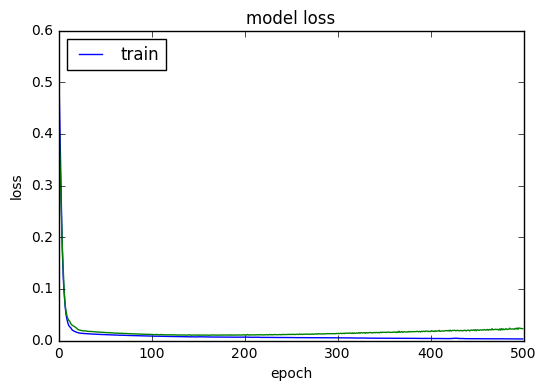

In [38]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(output_dim))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
history_w_model = model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test,y_test))

plt.plot(history_w_model.history['loss'], label='loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot(history_w_model.history['val_loss'], label='Val_loss')
plt.show()

In [57]:
# Prediction

# Make Predict Input Array

df_test = pd.read_csv('./create_input_array/phase1_testing_vol_route_weather_joined_table.csv')

df_test['date'] = pd.to_datetime(df_merged_volume['date'])


0     2016-09-20 00:00:00
1     2016-09-20 00:20:00
2     2016-09-20 00:40:00
3     2016-09-20 01:00:00
4     2016-09-20 01:20:00
5     2016-09-20 01:40:00
6     2016-09-20 02:00:00
7     2016-09-20 02:20:00
8     2016-09-20 02:40:00
9     2016-09-20 03:00:00
10    2016-09-20 03:20:00
11    2016-09-20 03:40:00
12    2016-09-20 04:00:00
13    2016-09-20 04:20:00
14    2016-09-20 04:40:00
15    2016-09-20 05:00:00
16    2016-09-20 05:20:00
17    2016-09-20 05:40:00
18    2016-09-20 06:00:00
19    2016-09-20 06:20:00
20    2016-09-20 06:40:00
21    2016-09-20 07:00:00
22    2016-09-20 07:20:00
23    2016-09-20 07:40:00
24    2016-09-20 08:00:00
25    2016-09-20 08:20:00
26    2016-09-20 08:40:00
27    2016-09-20 09:00:00
28    2016-09-20 09:20:00
29    2016-09-20 09:40:00
              ...        
475   2016-09-26 14:20:00
476   2016-09-26 14:40:00
477   2016-09-26 15:00:00
478   2016-09-26 15:20:00
479   2016-09-26 15:40:00
480   2016-09-26 16:00:00
481   2016-09-26 16:20:00
482   2016-0

In [66]:
# Prepare the test_input_array
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['date']

df_test['timeofday'] = df_test.date.apply( lambda d : d.hour+d.minute/60.)

# Select 6am-8am and 3pm-5pm
sel_rows_test = df_test[ lambda r : ((r.timeofday>= 6) & (r.timeofday<8)) |
		                        ((r.timeofday>=15) & (r.timeofday<17))
		           ]

sel_rows_test = sel_rows_test[ useful_cols ]
sel_rows_test.head(24)

,"(2, 0, 'tot')","('A', 2)",date,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,dayofweek,is_holiday,timeofday
18,24.0,40.200,2016-09-20 06:00:00,6,1012.500000,1017.500000,128.000000,1.600000,23.400000,73.000000,0.000000,1,0,6.000000
19,36.0,38.350,2016-09-20 06:20:00,6,1012.555556,1017.555556,136.555556,1.488889,23.122222,75.333333,0.200000,1,0,6.333333
20,46.0,57.410,2016-09-20 06:40:00,6,1012.611111,1017.611111,145.111111,1.377778,22.844444,77.666667,0.400000,1,0,6.666667
21,83.0,54.270,2016-09-20 07:00:00,7,1012.666667,1017.666667,153.666667,1.266667,22.566667,80.000000,0.600000,1,0,7.000000
22,87.0,55.940,2016-09-20 07:20:00,7,1012.722222,1017.722222,162.222222,1.155556,22.288889,82.333333,0.800000,1,0,7.333333
23,97.0,61.740,2016-09-20 07:40:00,7,1012.777778,1017.777778,170.777778,1.044444,22.011111,84.666667,1.000000,1,0,7.666667
45,74.0,103.170,2016-09-20 15:00:00,15,1013.700000,1018.700000,90.000000,1.900000,20.100000,95.000000,0.100000,1,0,15.000000
46,78.0,95.905,2016-09-20 15:20:00,15,1013.522222,1018.522222,93.888889,1.944444,20.088889,95.111111,0.233333,1,0,15.333333
47,53.0,77.705,2016-09-20 15:40:00,15,1013.344444,1018.344444,97.777778,1.988889,20.077778,95.222222,0.366667,1,0,15.666667
48,62.0,54.500,2016-09-20 16:00:00,16,1013.166667,1018.166667,101.666667,2.033333,20.066667,95.333333,0.500000,1,0,16.000000


In [ ]:
# get numpy array from panda dataframe
test_phase1_arr = sel_rows_test.values

# scale feature array to range -1 to 1
test_phase1_arr = scaler.transform(test_phase1_arr)

# sample subsequence from the time series 
train_seqs = []
nSegments = train_arr.shape[0]//12 # each segment holds 4hr data (12 datapoints, 20min each)
for segment in range(nSegments):
    for t in range(6):
        startIdx = segment*12 + t
        train_seqs.append(train_scaled_arr[startIdx: startIdx+7])
train_seqs = np.stack(train_seqs)

In [ ]:
pred_arr = []
for i in range(6):
    model.predict(pred_input)
    